In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
import time
from pandas_datareader.data import DataReader
from datetime import datetime
from yahoo_fin.stock_info import get_data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
Bitcoin= get_data("BTC-USD", start_date="01/01/2021", end_date=None, index_as_date = False, interval="1d")
NVIDIA= get_data("NVDA", start_date="01/01/2021", end_date=None, index_as_date = False, interval="1d")
AMD= get_data("AMD", start_date="01/01/2021", end_date=None, index_as_date = False, interval="1d")

In [3]:
Bitcoin = Bitcoin[['date', 'close']]
NVIDIA = NVIDIA[['date', 'close']]
AMD = AMD[['date', 'close']]

In [4]:
print(Bitcoin)

          date         close
0   2021-01-01  29374.152344
1   2021-01-02  32127.267578
2   2021-01-03  32782.023438
3   2021-01-04  31971.914062
4   2021-01-05  33992.429688
..         ...           ...
687 2022-11-19  16711.546875
688 2022-11-20  16291.832031
689 2022-11-21  15787.284180
690 2022-11-22  16189.769531
691 2022-11-23  16469.292969

[692 rows x 2 columns]


In [5]:
Bitcoin.columns = ['Date', 'Bitcoin_Closing']
NVIDIA.columns = ['Date', 'NVIDIA_Closing']
AMD.columns = ['Date', 'AMD_Closing']
Bitcoin.tail(10)

,Date,Bitcoin_Closing
682,2022-11-14,16618.199219
683,2022-11-15,16884.613281
684,2022-11-16,16669.439453
685,2022-11-17,16687.517578
686,2022-11-18,16697.777344
687,2022-11-19,16711.546875
688,2022-11-20,16291.832031
689,2022-11-21,15787.284180
690,2022-11-22,16189.769531
691,2022-11-23,16469.292969


In [6]:
print(AMD.head())

        Date  AMD_Closing
0 2021-01-04    92.300003
1 2021-01-05    92.769997
2 2021-01-06    90.330002
3 2021-01-07    95.160004
4 2021-01-08    94.580002


In [7]:
print(NVIDIA.head())

        Date  NVIDIA_Closing
0 2021-01-04      131.134995
1 2021-01-05      134.047501
2 2021-01-06      126.144997
3 2021-01-07      133.440002
4 2021-01-08      132.767502


In [8]:
SP_array_head = np.array([AMD,NVIDIA])
print(SP_array_head)

[[[Timestamp('2021-01-04 00:00:00') 92.30000305175781]
  [Timestamp('2021-01-05 00:00:00') 92.7699966430664]
  [Timestamp('2021-01-06 00:00:00') 90.33000183105469]
  ...
  [Timestamp('2022-11-21 00:00:00') 72.45999908447266]
  [Timestamp('2022-11-22 00:00:00') 75.25]
  [Timestamp('2022-11-23 00:00:00') 76.12100219726562]]

 [[Timestamp('2021-01-04 00:00:00') 131.13499450683594]
  [Timestamp('2021-01-05 00:00:00') 134.04750061035156]
  [Timestamp('2021-01-06 00:00:00') 126.1449966430664]
  ...
  [Timestamp('2022-11-21 00:00:00') 153.1699981689453]
  [Timestamp('2022-11-22 00:00:00') 160.3800048828125]
  [Timestamp('2022-11-23 00:00:00') 164.07000732421875]]]


In [9]:
#Importing GPU Price Dataframes
AMD_6700XT = pd.read_csv(r'6700XT.csv', sep=';')
AMD_6800XT = pd.read_csv(r'6800XT.csv', sep=';')
AMD_6900XT = pd.read_csv(r'6900XT.csv', sep=';')
RTX3070 = pd.read_csv(r'RTX3070.csv', sep=';')
RTX3080 = pd.read_csv(r'RTX3080.csv', sep=';')
RTX3090 = pd.read_csv(r'RTX3090.csv', sep=';')

In [10]:
#Lists
MANUFACTURERS = ['AMD', 'NVIDIA']
AMD_GPUs = ['AMD_6700XT', 'AMD_6800XT', 'AMD_6900XT']
NVIDIA_GPUs = ['RTX3070', 'RTX3080', 'RTX3090']
print(MANUFACTURERS)

['AMD', 'NVIDIA']


In [11]:
#Dictionary of Lists
GPU_Breakdown = {'Manufacturer':['AMD', 'AMD', 'AMD', 'NVIDIA', 'NVIDIA', 'NVIDIA'],
                    'GPU Type':['6700XT','6800XT', '6900XT', 'RTX3070', 'RTX3080', 'RTX3090'],
                    'Release Date': ['March 2021', 'October 2020', 'October 2020', 'October 2020', 'September 2020', 'September 2020']}

In [12]:
pd.DataFrame(GPU_Breakdown)

,Manufacturer,GPU Type,Release Date
0,AMD,6700XT,March 2021
1,AMD,6800XT,October 2020
2,AMD,6900XT,October 2020
3,NVIDIA,RTX3070,October 2020
4,NVIDIA,RTX3080,September 2020
5,NVIDIA,RTX3090,September 2020


In [13]:
print(AMD_6700XT.head())

         Date  MSI RX 6700 XT GAMING X 12G
0  2021-04-02                      1195.45
1  2021-04-03                      1098.67
2  2021-04-04                      1097.51
3  2021-04-05                      1092.74
4  2021-04-06                      1076.74


In [14]:
print(AMD_6800XT.head())

         Date  MSI RX 6800 XT GAMING X TRIO 16G
0  2020-12-31                            2030.0
1  2021-01-01                            2030.0
2  2021-01-02                            2030.0
3  2021-01-03                            2030.0
4  2021-01-04                            2030.0


In [15]:
print(AMD_6900XT.head())

         Date  MSI RX 6900 XT GAMING X TRIO 16G
0  2021-01-19                           2495.00
1  2021-01-20                           2399.50
2  2021-01-21                           1588.64
3  2021-01-22                           1585.66
4  2021-01-23                           1780.99


In [16]:
print(RTX3070.head())

         Date  MSI GEFORCE RTX 3070 SUPRIM X 8G
0  2020-11-13                            999.66
1  2020-11-14                           1038.00
2  2020-11-15                           1038.00
3  2020-11-16                           1038.00
4  2020-11-17                            976.33


In [17]:
print(RTX3080.head())

         Date  MSI GEFORCE RTX 3080 SUPRIM X 10G
0  2020-11-13                            1449.00
1  2020-11-14                            1439.99
2  2020-11-15                            1399.99
3  2020-11-16                            1099.00
4  2020-11-17                            1099.00


In [18]:
print(RTX3090.head())

         Date  MSI GEFORCE RTX 3090 SUPRIM X 24G
0  2020-11-18                            2540.85
1  2020-11-19                            2412.42
2  2020-11-20                            2406.91
3  2020-11-21                            2385.42
4  2020-11-22                            2428.27


In [19]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])
AMD['Date'] = pd.to_datetime(AMD['Date'])
NVIDIA['Date'] = pd.to_datetime(NVIDIA['Date'])
AMD_6700XT['Date'] = pd.to_datetime(AMD_6700XT['Date'])
AMD_6800XT['Date'] = pd.to_datetime(AMD_6800XT['Date'])
AMD_6900XT['Date'] = pd.to_datetime(AMD_6900XT['Date'])
RTX3070['Date'] = pd.to_datetime(RTX3070['Date'])
RTX3080['Date'] = pd.to_datetime(RTX3080['Date'])
RTX3090['Date'] = pd.to_datetime(RTX3090['Date'])

In [20]:
DateRange = pd.DataFrame({'Date':pd.date_range(start ='2021-01-01', end ='2022-11-11')})
print(DateRange)

          Date
0   2021-01-01
1   2021-01-02
2   2021-01-03
3   2021-01-04
4   2021-01-05
..         ...
675 2022-11-07
676 2022-11-08
677 2022-11-09
678 2022-11-10
679 2022-11-11

[680 rows x 1 columns]


In [21]:
df1 = pd.merge(DateRange, Bitcoin, on='Date', how='left')
df2 = pd.merge(df1, AMD, on='Date', how='left')
Stock_Prices = pd.merge(df2, NVIDIA, on='Date', how='left')

In [22]:
print(Stock_Prices)

          Date  Bitcoin_Closing  AMD_Closing  NVIDIA_Closing
0   2021-01-01     29374.152344          NaN             NaN
1   2021-01-02     32127.267578          NaN             NaN
2   2021-01-03     32782.023438          NaN             NaN
3   2021-01-04     31971.914062    92.300003      131.134995
4   2021-01-05     33992.429688    92.769997      134.047501
..         ...              ...          ...             ...
675 2022-11-07     20602.816406    63.080002      143.009995
676 2022-11-08     18541.271484    63.849998      146.020004
677 2022-11-09     15880.780273    59.919998      137.759995
678 2022-11-10     17586.771484    68.470001      157.500000
679 2022-11-11     17034.292969    72.370003      163.270004

[680 rows x 4 columns]


In [23]:
df3 = pd.merge(DateRange, AMD_6700XT, on='Date', how='left')
df4 = pd.merge(df3, AMD_6800XT, on='Date', how='left')
AMD_GPU_Prices = pd.merge(df4, AMD_6900XT, on='Date', how='left')

In [24]:
print(AMD_GPU_Prices)

          Date  MSI RX 6700 XT GAMING X 12G  MSI RX 6800 XT GAMING X TRIO 16G  \
0   2021-01-01                          NaN                           2030.00   
1   2021-01-02                          NaN                           2030.00   
2   2021-01-03                          NaN                           2030.00   
3   2021-01-04                          NaN                           2030.00   
4   2021-01-05                          NaN                           2030.00   
..         ...                          ...                               ...   
675 2022-11-07                       587.58                            857.68   
676 2022-11-08                       587.58                            857.68   
677 2022-11-09                       581.08                            817.20   
678 2022-11-10                       587.72                            846.30   
679 2022-11-11                       585.60                            834.76   

     MSI RX 6900 XT GAMING 

In [25]:
df5 = pd.merge(DateRange, RTX3070, on='Date', how='left')
df6 = pd.merge(df5, RTX3080, on='Date', how='left')
NVIDIA_GPU_Prices = pd.merge(df6, RTX3090, on='Date', how='left')

In [26]:
print(NVIDIA_GPU_Prices)

          Date  MSI GEFORCE RTX 3070 SUPRIM X 8G  \
0   2021-01-01                            924.11   
1   2021-01-02                            924.11   
2   2021-01-03                            924.11   
3   2021-01-04                            924.11   
4   2021-01-05                            924.11   
..         ...                               ...   
675 2022-11-07                            714.19   
676 2022-11-08                            714.19   
677 2022-11-09                            705.95   
678 2022-11-10                            713.09   
679 2022-11-11                            719.35   

     MSI GEFORCE RTX 3080 SUPRIM X 10G  MSI GEFORCE RTX 3090 SUPRIM X 24G  
0                              1357.46                            2344.08  
1                              1357.46                            2344.08  
2                              1357.46                            2344.08  
3                              1357.46                            2344.

In [27]:
GPU_Prices = pd.merge(AMD_GPU_Prices, NVIDIA_GPU_Prices, on='Date', how='left')

In [28]:
print(GPU_Prices)

          Date  MSI RX 6700 XT GAMING X 12G  MSI RX 6800 XT GAMING X TRIO 16G  \
0   2021-01-01                          NaN                           2030.00   
1   2021-01-02                          NaN                           2030.00   
2   2021-01-03                          NaN                           2030.00   
3   2021-01-04                          NaN                           2030.00   
4   2021-01-05                          NaN                           2030.00   
..         ...                          ...                               ...   
675 2022-11-07                       587.58                            857.68   
676 2022-11-08                       587.58                            857.68   
677 2022-11-09                       581.08                            817.20   
678 2022-11-10                       587.72                            846.30   
679 2022-11-11                       585.60                            834.76   

     MSI RX 6900 XT GAMING 

In [29]:
##Finding the null values in the dataframes
np.sum(Stock_Prices.isnull())

Date                 0
Bitcoin_Closing      0
AMD_Closing        210
NVIDIA_Closing     210
dtype: int64

In [30]:
##Finding tail columns with Null values
Stock_Prices.tail(10)

,Date,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing
670,2022-11-02,20159.503906,58.630001,132.190002
671,2022-11-03,20209.988281,60.110001,134.210007
672,2022-11-04,21147.230469,62.189999,141.559998
673,2022-11-05,21282.691406,NaN,NaN
674,2022-11-06,20926.486328,NaN,NaN
675,2022-11-07,20602.816406,63.080002,143.009995
676,2022-11-08,18541.271484,63.849998,146.020004
677,2022-11-09,15880.780273,59.919998,137.759995
678,2022-11-10,17586.771484,68.470001,157.500000
679,2022-11-11,17034.292969,72.370003,163.270004


In [31]:
##Filling null values with previous values
Stock_Prices = Stock_Prices.fillna(method='ffill')

In [32]:
##Viewing tail 10 columns in dataframe after filling Null values
Stock_Prices.tail(10)

,Date,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing
670,2022-11-02,20159.503906,58.630001,132.190002
671,2022-11-03,20209.988281,60.110001,134.210007
672,2022-11-04,21147.230469,62.189999,141.559998
673,2022-11-05,21282.691406,62.189999,141.559998
674,2022-11-06,20926.486328,62.189999,141.559998
675,2022-11-07,20602.816406,63.080002,143.009995
676,2022-11-08,18541.271484,63.849998,146.020004
677,2022-11-09,15880.780273,59.919998,137.759995
678,2022-11-10,17586.771484,68.470001,157.500000
679,2022-11-11,17034.292969,72.370003,163.270004


Text(0.5, 1.0, 'AMD GPU Prices')

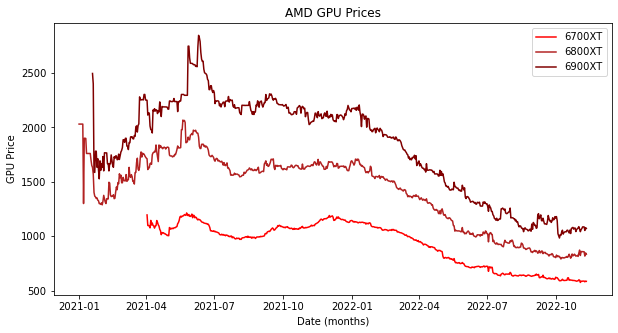

In [33]:
plt.subplots(figsize=(10,5))

plt.plot(AMD_GPU_Prices['Date'],AMD_GPU_Prices['MSI RX 6700 XT GAMING X 12G'], color='red')
plt.plot(AMD_GPU_Prices['Date'],AMD_GPU_Prices['MSI RX 6800 XT GAMING X TRIO 16G'], color='firebrick')
plt.plot(AMD_GPU_Prices['Date'],AMD_GPU_Prices['MSI RX 6900 XT GAMING X TRIO 16G'], color='maroon')

plt.xlabel('Date (months)')
plt.ylabel('GPU Price')
plt.legend(["6700XT", "6800XT", "6900XT"])
plt.title('AMD GPU Prices')

Text(0.5, 1.0, 'NVIDIA GPU Prices')

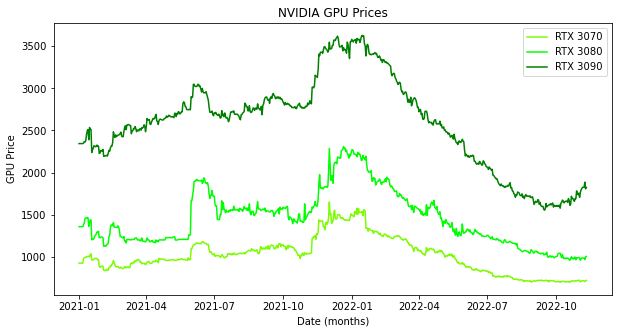

In [34]:
plt.subplots(figsize=(10,5))

plt.plot(NVIDIA_GPU_Prices['Date'],NVIDIA_GPU_Prices['MSI GEFORCE RTX 3070 SUPRIM X 8G'], color='lawngreen')
plt.plot(NVIDIA_GPU_Prices['Date'],NVIDIA_GPU_Prices['MSI GEFORCE RTX 3080 SUPRIM X 10G'], color='lime')
plt.plot(NVIDIA_GPU_Prices['Date'],NVIDIA_GPU_Prices['MSI GEFORCE RTX 3090 SUPRIM X 24G'], color='green')

plt.xlabel('Date (months)')
plt.ylabel('GPU Price')
plt.legend(["RTX 3070", "RTX 3080", "RTX 3090"])
plt.title('NVIDIA GPU Prices')

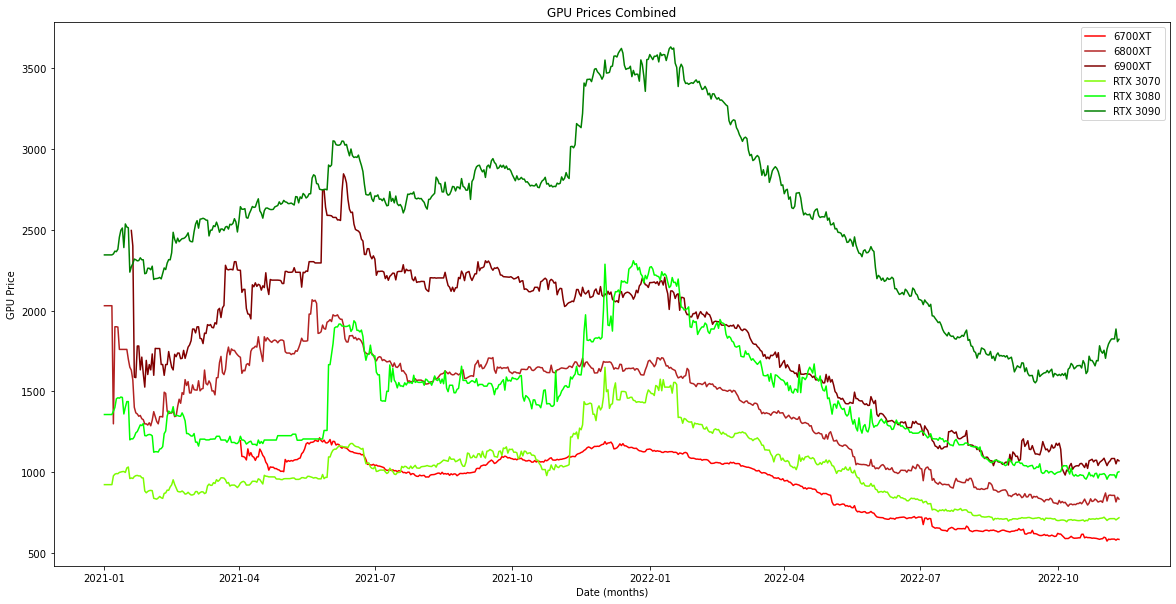

In [35]:
plt.subplots(figsize=(20,10))
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI RX 6700 XT GAMING X 12G'], color='red')
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI RX 6800 XT GAMING X TRIO 16G'], color='firebrick')
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI RX 6900 XT GAMING X TRIO 16G'], color='maroon')
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI GEFORCE RTX 3070 SUPRIM X 8G'], color='lawngreen')
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI GEFORCE RTX 3080 SUPRIM X 10G'], color='lime')
plt.plot(GPU_Prices['Date'],GPU_Prices['MSI GEFORCE RTX 3090 SUPRIM X 24G'], color='green')

plt.xlabel('Date (months)')
plt.ylabel('GPU Price')
plt.legend(["6700XT", "6800XT", "6900XT", "RTX 3070", "RTX 3080", "RTX 3090"])
plt.title('GPU Prices Combined')
plt.rcParams['font.size'] = 15

Text(0.5, 1.0, 'Bitcoin Price')

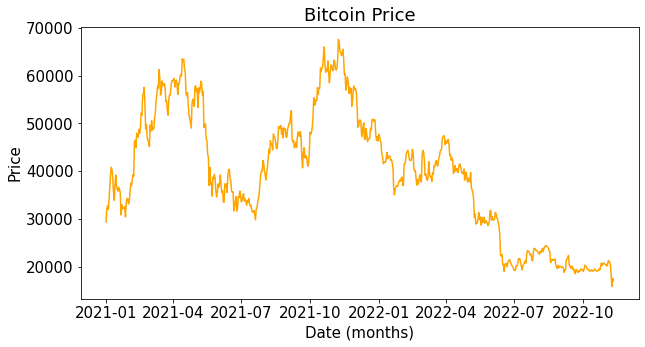

In [36]:
plt.subplots(figsize=(10,5))

plt.plot(Stock_Prices['Date'],Stock_Prices['Bitcoin_Closing'], color='orange')

plt.xlabel('Date (months)')
plt.ylabel('Price')
plt.title('Bitcoin Price')

Text(0.5, 1.0, 'Stock Prices')

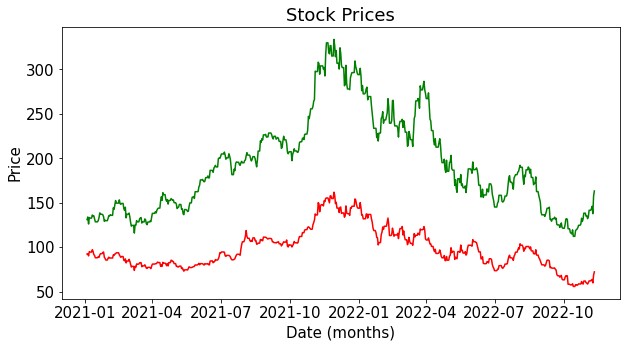

In [37]:
plt.subplots(figsize=(10,5))

plt.plot(Stock_Prices['Date'],Stock_Prices['AMD_Closing'], color='red')
plt.plot(Stock_Prices['Date'],Stock_Prices['NVIDIA_Closing'], color='green')

plt.xlabel('Date (months)')
plt.ylabel('Price')
plt.title('Stock Prices')

In [38]:
Stock_Prices_monthly = Stock_Prices.groupby(Stock_Prices.Date.dt.to_period('M')).agg('mean').reset_index()
Stock_Prices_monthly.columns = ['Month','Bitcoin_Closing' ,'AMD_Closing' ,'NVIDIA_Closing']

In [39]:
##Importing Month end from panda package
from pandas.tseries.offsets import MonthEnd

##Converting Mont column to string
Stock_Prices_monthly['Month'] = Stock_Prices_monthly['Month'].astype(str)

##Getting Month end date to Month column
Stock_Prices_monthly['Month'] = pd.to_datetime(Stock_Prices_monthly['Month'])+ MonthEnd(0)
Stock_Prices_monthly.dtypes

Month              datetime64[ns]
Bitcoin_Closing           float64
AMD_Closing               float64
NVIDIA_Closing            float64
dtype: object

In [40]:
Stock_Prices_monthly

,Month,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing
0,2021-01-31,34761.649950,91.162143,132.502055
1,2021-02-28,46306.798968,88.935715,143.077144
2,2021-03-31,54998.008695,79.274516,128.437259
3,2021-04-30,57206.720052,81.911334,149.268998
4,2021-05-31,46443.286668,77.552903,148.584032
5,2021-06-30,35845.154687,83.320333,182.319083
6,2021-07-31,34444.973790,92.295161,196.474758
7,2021-08-31,45709.022681,108.809033,207.477098
8,2021-09-30,45939.771484,105.838666,220.705000
9,2021-10-31,57911.970514,112.237419,221.862902


Text(0.5, 1.0, 'Stock Prices')

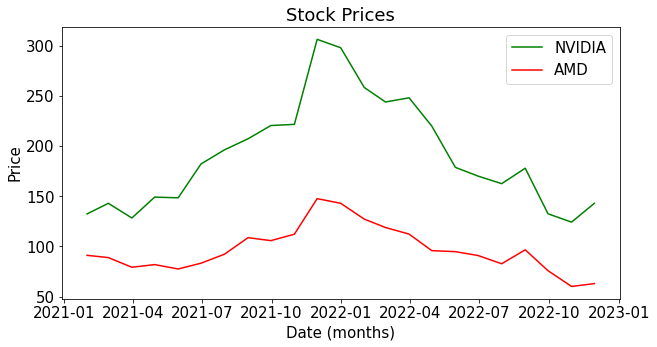

In [41]:
plt.subplots(figsize=(10,5))

plt.plot(Stock_Prices_monthly['Month'],Stock_Prices_monthly['NVIDIA_Closing'], color='green')
plt.plot(Stock_Prices_monthly['Month'],Stock_Prices_monthly['AMD_Closing'], color='red')

plt.xlabel('Date (months)')
plt.ylabel('Price')
plt.legend(["NVIDIA","AMD"], loc ="upper right")
plt.title('Stock Prices')

In [42]:
df7 = pd.merge(Stock_Prices, NVIDIA_GPU_Prices, on='Date', how='left')
Data_final = pd.merge(df7, AMD_GPU_Prices, on='Date', how='left')
Data_final

,Date,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing,MSI GEFORCE RTX 3070 SUPRIM X 8G,MSI GEFORCE RTX 3080 SUPRIM X 10G,MSI GEFORCE RTX 3090 SUPRIM X 24G,MSI RX 6700 XT GAMING X 12G,MSI RX 6800 XT GAMING X TRIO 16G,MSI RX 6900 XT GAMING X TRIO 16G
0,2021-01-01,29374.152344,NaN,NaN,924.11,1357.46,2344.08,NaN,2030.00,NaN
1,2021-01-02,32127.267578,NaN,NaN,924.11,1357.46,2344.08,NaN,2030.00,NaN
2,2021-01-03,32782.023438,NaN,NaN,924.11,1357.46,2344.08,NaN,2030.00,NaN
3,2021-01-04,31971.914062,92.300003,131.134995,924.11,1357.46,2344.08,NaN,2030.00,NaN
4,2021-01-05,33992.429688,92.769997,134.047501,924.11,1357.46,2344.08,NaN,2030.00,NaN
...,...,...,...,...,...,...,...,...,...,...
675,2022-11-07,20602.816406,63.080002,143.009995,714.19,984.14,1824.67,587.58,857.68,1085.57
676,2022-11-08,18541.271484,63.849998,146.020004,714.19,984.14,1824.67,587.58,857.68,1085.57
677,2022-11-09,15880.780273,59.919998,137.759995,705.95,965.86,1886.04,581.08,817.20,1052.69
678,2022-11-10,17586.771484,68.470001,157.500000,713.09,999.79,1807.62,587.72,846.30,1078.59


In [43]:
Data_final.corr()

,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing,MSI GEFORCE RTX 3070 SUPRIM X 8G,MSI GEFORCE RTX 3080 SUPRIM X 10G,MSI GEFORCE RTX 3090 SUPRIM X 24G,MSI RX 6700 XT GAMING X 12G,MSI RX 6800 XT GAMING X TRIO 16G,MSI RX 6900 XT GAMING X TRIO 16G
Bitcoin_Closing,1.000000,0.511945,0.443479,0.558857,0.398048,0.674600,0.821883,0.752984,0.725260
AMD_Closing,0.511945,1.000000,0.934711,0.807145,0.767602,0.746297,0.583890,0.384010,0.391477
NVIDIA_Closing,0.443479,0.934711,1.000000,0.819719,0.803675,0.759598,0.617760,0.351128,0.394473
MSI GEFORCE RTX 3070 SUPRIM X 8G,0.558857,0.807145,0.819719,1.000000,0.947400,0.961141,0.827014,0.644779,0.664562
MSI GEFORCE RTX 3080 SUPRIM X 10G,0.398048,0.767602,0.803675,0.947400,1.000000,0.900134,0.744588,0.558614,0.600337
MSI GEFORCE RTX 3090 SUPRIM X 24G,0.674600,0.746297,0.759598,0.961141,0.900134,1.000000,0.917726,0.772354,0.786808
MSI RX 6700 XT GAMING X 12G,0.821883,0.583890,0.617760,0.827014,0.744588,0.917726,1.000000,0.966473,0.941536
MSI RX 6800 XT GAMING X TRIO 16G,0.752984,0.384010,0.351128,0.644779,0.558614,0.772354,0.966473,1.000000,0.973377
MSI RX 6900 XT GAMING X TRIO 16G,0.725260,0.391477,0.394473,0.664562,0.600337,0.786808,0.941536,0.973377,1.000000


In [44]:
np.sum(Data_final.isnull())

Date                                  0
Bitcoin_Closing                       0
AMD_Closing                           3
NVIDIA_Closing                        3
MSI GEFORCE RTX 3070 SUPRIM X 8G      0
MSI GEFORCE RTX 3080 SUPRIM X 10G     0
MSI GEFORCE RTX 3090 SUPRIM X 24G     0
MSI RX 6700 XT GAMING X 12G          91
MSI RX 6800 XT GAMING X TRIO 16G      0
MSI RX 6900 XT GAMING X TRIO 16G     18
dtype: int64

In [45]:
Data_final = Data_final.fillna(method='bfill')
Data_final

,Date,Bitcoin_Closing,AMD_Closing,NVIDIA_Closing,MSI GEFORCE RTX 3070 SUPRIM X 8G,MSI GEFORCE RTX 3080 SUPRIM X 10G,MSI GEFORCE RTX 3090 SUPRIM X 24G,MSI RX 6700 XT GAMING X 12G,MSI RX 6800 XT GAMING X TRIO 16G,MSI RX 6900 XT GAMING X TRIO 16G
0,2021-01-01,29374.152344,92.300003,131.134995,924.11,1357.46,2344.08,1195.45,2030.00,2495.00
1,2021-01-02,32127.267578,92.300003,131.134995,924.11,1357.46,2344.08,1195.45,2030.00,2495.00
2,2021-01-03,32782.023438,92.300003,131.134995,924.11,1357.46,2344.08,1195.45,2030.00,2495.00
3,2021-01-04,31971.914062,92.300003,131.134995,924.11,1357.46,2344.08,1195.45,2030.00,2495.00
4,2021-01-05,33992.429688,92.769997,134.047501,924.11,1357.46,2344.08,1195.45,2030.00,2495.00
...,...,...,...,...,...,...,...,...,...,...
675,2022-11-07,20602.816406,63.080002,143.009995,714.19,984.14,1824.67,587.58,857.68,1085.57
676,2022-11-08,18541.271484,63.849998,146.020004,714.19,984.14,1824.67,587.58,857.68,1085.57
677,2022-11-09,15880.780273,59.919998,137.759995,705.95,965.86,1886.04,581.08,817.20,1052.69
678,2022-11-10,17586.771484,68.470001,157.500000,713.09,999.79,1807.62,587.72,846.30,1078.59


In [46]:
#Linear Regression
y = Data_final['Bitcoin_Closing']
x = Data_final.drop(['Date','Bitcoin_Closing'], axis = 1)

In [47]:
x_target, x_test, y_target, y_test = train_test_split(x, y, train_size = 0.65, random_state = 0)

In [48]:
model = LinearRegression()
model.fit(x_target, y_target)

LinearRegression()

In [49]:
#display regression coefficients and Model accuracy score
print(model.intercept_, model.coef_, model.score(x_test, y_test))

-9759.775908010211 [116.1388911   80.67881735  -2.92519136 -37.79769341  16.974401
  25.08697232   7.57284275   0.64511642] 0.7923434233638512


In [50]:
y_pred = model.predict(x_test)

In [51]:
Bitcoin_Act2Pred = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})

In [52]:
##Rounding up the column price values up to two decimals
Bitcoin_Act2Pred[['Actual', 'Predicted']] = Bitcoin_Act2Pred[['Actual', 'Predicted']].round(2)
Bitcoin_Act2Pred.head(10)

,Actual,Predicted
113,50050.87,49571.77
591,24136.97,27273.98
306,62970.05,55942.57
157,33560.71,35198.45
313,64995.23,59638.23
422,37709.79,45890.18
75,58870.89,48033.17
484,37714.88,32254.00
625,19419.51,18877.93
556,19970.56,20978.46
